In this practice, we focus on the concept of regression and its Python implementation. Regression was one of the supervised Machine learning types.

Linear regression is a statistical modeling technique that examines the linear relationship between two (Simple Linear Regression) or more (Multiple Linear Regression) variables — a dependent variable and independent variable(s). A linear relationship means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) as well.

In this excercise, we work with a simple student dataset. we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam.

# Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset


The dataset being used for this example has been made publicly available and can be downloaded from this link:

https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

In [2]:
data = pd.read_csv('student_scores.csv')
print('data shape is:', data.shape)
data.head()

data shape is: (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Get some Information about Data


Lets take a look at the statistical details of dataset features.

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


And finally, let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

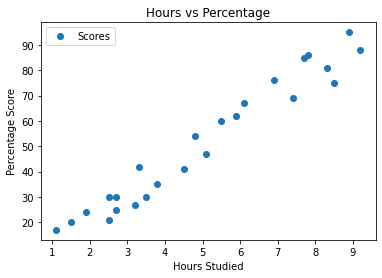

In [5]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Data Division

Now that we have an idea about the statistical details of our data, the next step is to divide the data into "attributes" and "labels". Attributes are the independent variables (also known as "features") while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. 

In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
print('Data Shape:', X.shape)
print('label shape:', y.shape)

Data Shape: (25, 1)
label shape: (25,)


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Train Data Shape:', X_train.shape)
print('Test Data Shape:', X_test.shape)

Train Data Shape: (20, 1)
Test Data Shape: (5, 1)


# Linear Regression

**Training**

Next we want to train a linear regression model with our training data and evaluate the trained model with our test data. 

In the theory section we said that linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. Ok lets find out..

We use LinearRegression method from Sklearn. Here you can find more information about it and check what kind of input variable you can pass to it.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

In [8]:
from sklearn.linear_model import LinearRegression
# Training
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('linear regression intercept:', regressor.intercept_)
print('linear regression slope:', regressor.coef_)

linear regression intercept: 2.018160041434662
linear regression slope: [9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

**Evaluation**

Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score.

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, there are some evaluation metrics such as Mean Square Error (MSE) which is the mean of the absolute value of the errors (|actual - prediction|).

In [9]:
from sklearn import metrics
from matplotlib import pyplot as plt

y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

# Visualization

Lets visualize the regression line on the train and test data to see how the linear regression algorithm fit the data.

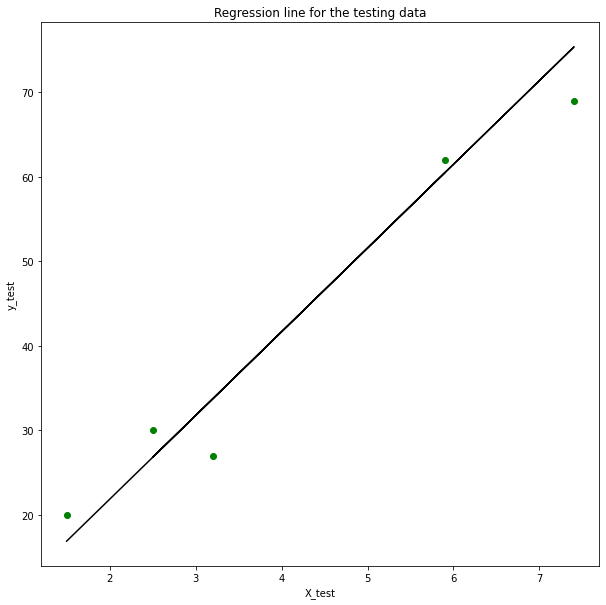

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color='g')
plt.title('Regression line for the testing data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.plot(X_test, regressor.predict(X_test), color='k')
plt.show()

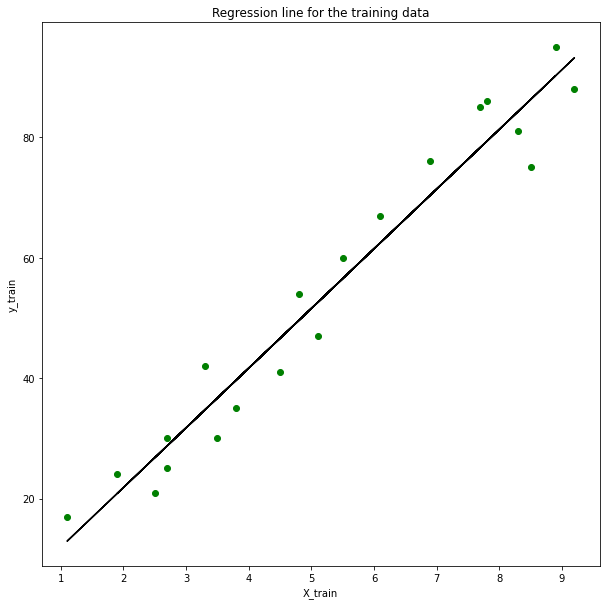

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color='g')
plt.title('Regression line for the training data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.plot(X_train, regressor.predict(X_train), color='k')
plt.show()

# Multivariate Regression Problem
Almost all real world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called "multiple linear regression". The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation. You can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

In this section we will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.


The dataset for this example is available at:

https://drive.google.com/open?id=1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_

since we have already imported required libraries for the previous excercise, we don't need to reimport it here again.

# Loading the Dataset and getting the information

Let's load our dataset and get some general information about it.

In [12]:
gas_data = pd.read_csv('petrol_consumption.csv')
print('data shape is:', gas_data.shape)

data shape is: (48, 5)


In [13]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [14]:
gas_data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Data Division
The next step is to divide the data into attributes and labels as we did previously. However, unlike last time, this time around we are going to use column names for creating an attribute set and label.

After that we will divide our data to train and test parts.

In [15]:
gas_X = gas_data[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
gas_y = gas_data['Petrol_Consumption']

gas_X_train, gas_X_test, gas_y_train, gas_y_test = train_test_split(gas_X, gas_y, test_size=0.2, random_state=0)

# Training Regression Algorithm

**Training**

In [16]:
gas_regressor = LinearRegression()
gas_regressor.fit(gas_X_train, gas_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As said earlier, in case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [17]:
coeff_df = pd.DataFrame(gas_regressor.coef_, gas_X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


This means that for a unit increase in "petrol_tax", there is a decrease of 40.01 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

**Making Prediction and Evaluation**

In [18]:
gas_y_pred = gas_regressor.predict(gas_X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(gas_y_test, gas_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(gas_y_test, gas_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(gas_y_test, gas_y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


You can see that the value of root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

# Conclusion

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:
* Need more data: Only one year worth of data isn't that much, whereas 


* having multiple years worth could have helped us improve the accuracy quite a bit.
* Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.
* Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

# More things to do
Play around with the code and data in this article to see if you can improve the results (try changing the training/test size, transform/scale input features, etc.)

If you want to know how we solve **nonlinear** regression problems and how we use **other** types of **machine learning algorithm** for solving regressino problems, Please check out this useful resouce in this link:
https://www.pluralsight.com/guides/non-linear-regression-trees-scikit-learn